In [6]:
import math
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 地球半径，单位为千米
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    a = math.sin(dLat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dLon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

In [7]:
coordinates = {
    "北京": (39.9042, 116.4074),
    "天津": (39.0841, 117.2009),
    "河北": (38.0230, 114.3042),
    "山西": (37.52, 112.33),
    "内蒙古": (40.49, 111.41),
    
    "辽宁": (41.48, 123.25),
    "吉林": (43.54, 125.19),
    "黑龙江": (45.45, 126.38),
    "上海": (31.14, 121.29),
    "江苏": (32.03, 118.47),
    
    "浙江": (30.16, 120.12),
    "安徽": (31.52, 117.17),
    "福建": (26.05, 119.18),
    "江西": (28.40, 115.55),
    "山东": (36.40, 117.02),
    
    "河南": (34.46, 113.40),
    "湖北": (30.37, 114.10),
    "湖南": (28.1149, 112.5933),
    "广东": (23.0632, 113.1553),
    "广西": (22.48, 108.19),
    
    "海南": (20.02, 110.20),
    "重庆": (29.35, 106.33),
    "四川": (30.57, 104.05),
    "贵州": (26.35, 106.42),
    "云南": (25.0211, 102.4231),
    
    "西藏": (29.36, 91.06),
    "陕西": (34.16, 108.54),
    "甘肃": (36.03, 103.40),
    "青海": (36.38, 101.49),
    "宁夏": (38.28, 106.16),
    
    "新疆": (43.46, 87.37)
}

In [8]:
# 假设已经有各省份省会经纬度坐标的字典
n = len(coordinates)
distance_matrix = [[0 for _ in range(n)] for _ in range(n)]
for i, province1 in enumerate(coordinates):
    for j, province2 in enumerate(coordinates):
        if i!= j:
            lat1, lon1 = coordinates[province1]
            lat2, lon2 = coordinates[province2]
            distance_matrix[i][j] = haversine(lat1, lon1, lat2, lon2)

In [9]:
distance_matrix

[[0,
  113.80501006296645,
  277.1498706703468,
  442.00462316113624,
  429.3565029787379,
  602.731451044006,
  832.8728473984797,
  1020.9268018150086,
  1069.5653239604526,
  894.9527281154762,
  1134.7043236409115,
  934.8079540558314,
  1561.837633649384,
  1281.619953122779,
  393.3107227738675,
  661.2884392440423,
  1080.6001296488946,
  1356.8469453632324,
  1897.4689904747074,
  2086.763451422624,
  2288.865887714165,
  1490.2754307520847,
  1525.8598379419798,
  1768.2269236508714,
  2106.21364177355,
  2585.9741606641915,
  945.6727346837374,
  1217.4747106692964,
  1360.2395377130836,
  902.0781445759332,
  2430.9206436906957],
 [113.80501006296645,
  0,
  278.1350010710622,
  459.16390608210617,
  518.794531194803,
  577.9737230343345,
  830.4642066898779,
  1033.9068194208267,
  958.1598297936636,
  792.7104313185918,
  1027.4629964931619,
  841.0942019320173,
  1461.0304758488774,
  1197.7182212473645,
  298.88166124208476,
  615.4743772424517,
  1009.362964107452,
  12

In [10]:
#设置T，得到alpha_matrix和dis
T = 1000
# 计算alpha_matrix
alpha_matrix = [[0 for _ in range(n)] for _ in range(n)]
dis = [[0 for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        if distance_matrix[i][j] <= T:
            alpha_matrix[i][j] = (T - distance_matrix[i][j]) / T
        else:
            alpha_matrix[i][j] = 0

# 将distance_matrix中大于T的设置为0，小于等于T的设置为1
for i in range(n):
    for j in range(n):
        if distance_matrix[i][j] > T:
            dis[i][j] = 0
        else:
            dis[i][j] = 1
# 打印alpha_matrix
print(alpha_matrix)
# 打印处理后的distance_matrix
print(dis)

[[1.0, 0.8861949899370336, 0.7228501293296532, 0.5579953768388638, 0.570643497021262, 0.397268548955994, 0.16712715260152028, 0, 0, 0.10504727188452376, 0, 0.06519204594416862, 0, 0, 0.6066892772261325, 0.33871156075595776, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.054327265316262585, 0, 0, 0.09792185542406685, 0], [0.8861949899370336, 1.0, 0.7218649989289377, 0.5408360939178938, 0.48120546880519705, 0.42202627696566547, 0.16953579331012214, 0, 0.04184017020633644, 0.20728956868140824, 0, 0.1589057980679827, 0, 0, 0.7011183387579153, 0.38452562275754826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05351514679324146, 0, 0, 0.03807032950934285, 0], [0.7228501293296532, 0.7218649989289377, 1.0, 0.8176906606259426, 0.6294423720572876, 0.14465954917439763, 0, 0, 0.0032928886408243444, 0.23343869983429705, 0, 0.23109948966195998, 0, 0, 0.6993409266438434, 0.5956057890510329, 0.1488187505455636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.32737365755267556, 0.0076014274312839235, 0, 0.28751654939983895, 0], [0.5579953768388638, 

In [11]:
V =[0.42, 0.464, 0.481, 0.388, 0.637, 0.357, 0.373, 0.287, 0.365, 0.419, 0.444, 0.487, 0.363, 0.548, 0.382, 0.477, 0.626, 0.469, 0.613, 0.398, 0.264, 0.551, 0.546, 0.496, 0.5, 0.495, 0.775, 0.521, 0.489, 0.413, 0.408]

In [12]:
import numpy as np
import random
def initialize_population(pop_size, n, k):
    population = []
    for _ in range(pop_size):
        individual = np.zeros(n, dtype=int)
        indices = random.sample(range(n), k)  # 随机选择k个位置
        for index in indices:
            individual[index] = 1
        population.append(individual)
    return np.array(population)

In [13]:
def calculate_performance(x, alpha, dis, V):
    n = len(x)
    beta = np.zeros(n)
    for i in range(n):
        numerator = 0
        denominator = 0
        for j in range(n):
            if j!= i:
                numerator += x[j]*alpha[i,j]*V[j]
                denominator += x[j]*dis[i,j]*V[j]
        if denominator == 0:
            beta[i]=0
        else:
            beta[i]=numerator/denominator
    per = np.zeros(n)
    for i in range(n):
        per[i] = V[i] / (1 + beta[i])
    return np.sum(x * per)

In [14]:
#设计适应度函数
def fitness_function(x, alpha, dis, V, k):
    n = len(x)
    per_value = calculate_performance(x, alpha, dis, V)
    # 检查约束8
    if np.sum(x) > k:
        return 0
    # 检查约束9
    for i in range(n):
        if not any([x[j] == 1 and dis[i, j] == 1 for j in range(n)]):
            return 0
    return per_value

In [15]:
def selection(population, fitnesses):
    num_individuals = len(population)
    num_to_keep = int(num_individuals * 0.50)  # 确定要保留的前%个体数量
    sorted_indices = np.argsort(fitnesses)[::-1]  # 按适应度从高到低排序个体索引
    keep_indices = sorted_indices[:num_to_keep]  # 取出前5%个体的索引

    remaining_indices = sorted_indices[num_to_keep:]  # 剩下个体的索引
    remaining_fitnesses = np.array(fitnesses)[remaining_indices]
    remaining_fitness_sum = np.sum(remaining_fitnesses)
    remaining_probabilities = remaining_fitnesses / remaining_fitness_sum if remaining_fitness_sum > 0 else np.ones(len(remaining_fitnesses)) / len(remaining_fitnesses)
    selected_remaining_indices = np.random.choice(len(remaining_indices), size=num_individuals - num_to_keep, p=remaining_probabilities)
    # 把选中的剩下个体索引对应回原种群中的索引
    selected_remaining_original_indices = remaining_indices[selected_remaining_indices]

    selected_indices = np.concatenate((keep_indices, selected_remaining_original_indices))
    return np.array(population)[selected_indices]

In [16]:
#采用单点交叉。随机选择两个个体，在某个点上进行交叉操作，生成两个新的个体。
## 已修改，总和为k
def single_point_crossover(parent1, parent2, k):
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))

    # 检查并调整child1中1的数量使其等于k
    num_ones_child1 = np.sum(child1)
    if num_ones_child1 > k:
        excess_ones = num_ones_child1 - k
        ones_indices = np.where(child1 == 1)[0]
        indices_to_change = np.random.choice(ones_indices, size=excess_ones, replace=False)
        child1[indices_to_change] = 0
    elif num_ones_child1 < k:
        shortage_ones = k - num_ones_child1
        zeros_indices = np.where(child1 == 0)[0]
        indices_to_change = np.random.choice(zeros_indices, size=shortage_ones, replace=False)
        child1[indices_to_change] = 1

    # 检查并调整child2中1的数量使其等于k
    num_ones_child2 = np.sum(child2)
    if num_ones_child2 > k:
        excess_ones = num_ones_child2 - k
        ones_indices = np.where(child2 == 1)[0]
        indices_to_change = np.random.choice(ones_indices, size=excess_ones, replace=False)
        child2[indices_to_change] = 0
    elif num_ones_child2 < k:
        shortage_ones = k - num_ones_child2
        zeros_indices = np.where(child2 == 0)[0]
        indices_to_change = np.random.choice(zeros_indices, size=shortage_ones, replace=False)
        child2[indices_to_change] = 1

    return child1, child2

In [17]:
#对种群中的个体进行两两交叉操作：
def crossover(population, crossover_rate,k):
    new_population = []
    for i in range(0, len(population), 2):
        if np.random.rand() < crossover_rate:
            child1, child2 = single_point_crossover(population[i], population[i + 1],k)
            new_population.append(child1)
            new_population.append(child2)
        else:
            new_population.append(population[i])
            new_population.append(population[i + 1])
    return np.array(new_population)

In [18]:
#以一定的变异概率（设为）对个体中的每一位进行变异操作
# def mutation(population, mutation_rate):
#     for i in range(len(population)):
#         for j in range(len(population[i])):
#             if np.random.rand() < mutation_rate:
#                 population[i][j] = 1 - population[i][j]
#     return population

##已修改
import numpy as np

def mutation(population, mutation_rate):
    for i in range(len(population)):
        individual = population[i]
        num_ones = np.sum(individual)
        # 找到值为1的位置索引列表
        ones_indices = np.where(individual == 1)[0]
        # 找到值为0的位置索引列表
        zeros_indices = np.where(individual == 0)[0]
        for j in range(len(individual)):
            if np.random.rand() < mutation_rate:
                # 随机选择一个1的位置和一个0的位置进行交换
                if ones_indices.size > 0 and zeros_indices.size > 0:
                    one_index = random.choice(ones_indices)
                    zero_index = random.choice(zeros_indices)
                    individual[one_index], individual[zero_index] = individual[zero_index], individual[one_index]
    return population

In [36]:
#重复进行选择、交叉、变异操作，直到满足停止条件（例如达到最大迭代次数）
didian =['北京', '天津', '河北', '山西', '内蒙古', '辽宁', '吉林', '黑龙江', '上海', '江苏', '浙江', '安徽', '福建', '江西', '山东', '河南', '湖北', '湖南', '广东', '广西', '海南', '重庆', '四川', '贵州', '云南', '西藏', '陕西', '甘肃', '青海', '宁夏', '新疆']

def genetic_algorithm(n, k, alpha, dis, V, pop_size, crossover_rate, mutation_rate, max_iter):
    population = initialize_population(pop_size, n, k )
    guocheng = []
    jixian = 0
    for i in range(max_iter):
        fitnesses = np.array([fitness_function(x, alpha, dis, V, k) for x in population])
        new_population = selection(population, fitnesses)
        new_population = crossover(new_population, crossover_rate,k)
        new_population = mutation(new_population, mutation_rate)
        population = new_population

        best_index = np.argmax([fitness_function(x, alpha, dis, V, k)  for x in population])
        bestv = fitness_function(population[best_index],alpha, dis, V,k)
        guocheng.append(bestv)
        if bestv > jixian:
            jixian = bestv
            print(f"已过{i}轮，最好成绩",jixian)
            so = population[best_index]
            print(so)
            print("best:",fitness_function(population[best_index],alpha, dis, V,k))
            for i in range(len(so)):
                if so[i] == 1:
                    print(didian[i])
                
    return jixian

In [ ]:
# 假设参数已定义
import numpy as np
alpha = np.array(alpha_matrix)
dis  = np.array(dis)
k=10
crossover_rate = [i*0.1 for i in range(1,10,2)]
mutation_rate = [i*0.1 for i in range(1,10,2)]
jieguoi=[]
for i in range(len(crossover_rate)):
    jieguoj=[]
    for j in range(len(mutation_rate)):
        best= genetic_algorithm(n, k, alpha, dis, V, pop_size=1000, crossover_rate=crossover_rate[i], mutation_rate=mutation_rate[j], max_iter=50)
        jieguoj.append(best)
    jieguoi.append(jieguoj)
print(jieguoi)

已过0轮，最好成绩 4.437915955731852
[0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1]
best: 4.437915955731852
内蒙古
吉林
上海
山东
湖北
广东
重庆
西藏
陕西
新疆
已过1轮，最好成绩 4.5035731919562965
[0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1]
best: 4.5035731919562965
内蒙古
吉林
上海
湖北
广东
重庆
四川
西藏
陕西
新疆
已过3轮，最好成绩 4.527299523092293
[0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1]
best: 4.527299523092293
内蒙古
吉林
上海
湖北
广东
重庆
四川
西藏
青海
新疆
已过0轮，最好成绩 4.220920086478655
[0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1]
best: 4.220920086478655
内蒙古
辽宁
福建
江西
湖北
广西
四川
贵州
西藏
新疆
已过1轮，最好成绩 4.340227834573013
[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1]
best: 4.340227834573013
北京
天津
吉林
湖北
广东
贵州
西藏
陕西
宁夏
新疆
已过5轮，最好成绩 4.54959660375549
[0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1]
best: 4.54959660375549
内蒙古
辽宁
浙江
江西
广东
云南
西藏
陕西
青海
新疆
已过0轮，最好成绩 4.21781317239808
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1]
best: 4.21781317239808
北京
吉林

In [5]:
crossover_rate = [i*0.1 for i in range(1,10,2)]
crossover_rate

[0.1, 0.30000000000000004, 0.5, 0.7000000000000001, 0.9]

In [23]:
jieguoi

[[4.626189752265135,
  4.619506752730862,
  4.449635670302026,
  4.574326330194748,
  4.645204460682687],
 [4.4725766598617,
  4.63866198916492,
  4.711938459334069,
  4.598190364950601,
  4.54852369113273],
 [4.534443547936837,
  4.471983816166249,
  4.5568313307818284,
  4.5229016812345515,
  4.452109703700613],
 [4.568122848311401,
  4.545199235981264,
  4.564727172949468,
  4.521041550014086,
  4.535855310247036],
 [4.498353590189552,
  4.536984172284029,
  4.493409565500116,
  4.540600539492585,
  4.459995333472375]]

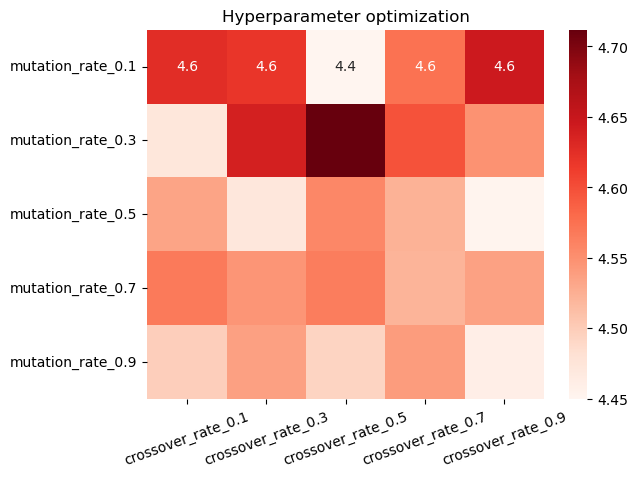

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 给定的数据
data = jieguoi

# 将数据转换为numpy数组，方便后续操作（seaborn也支持直接传入列表形式数据，这一步不是必需但更通用些）
data_array = np.array(data)
crossover_rate = [0.1,0.3,0.5,0.7,0.9]
mutation_rate = [0.1,0.3,0.5,0.7,0.9]
# 设置横纵坐标名称
crossover_rate = [f"crossover_rate_{crossover_rate[i]}" for i in range(len(data[0]))]
mutation_rate = [f"mutation_rate_{mutation_rate[i]}" for i in range(len(data))]

# 绘制热力图
ax = sns.heatmap(data_array, annot=True, cmap="Reds", xticklabels=crossover_rate, yticklabels=mutation_rate)

# 设置图表标题
ax.set_title("Hyperparameter optimization")
# 获取当前的坐标轴对象，对横坐标标签进行旋转设置
plt.xticks(rotation=20)
# 展示图表
plt.show()

In [35]:
import folium
import json

# 创建地图对象，中心位置设为中国大致中心，缩放级别为4
m = folium.Map(location=[35, 105], zoom_start = 4)

# 读取中国省份边界的GeoJSON文件
with open('china_provinces.geojson', 'r') as f:
    geo_json_data = json.load(f)

# 定义要高亮显示的省份名称列表
target_provinces = ['广东省', '山东省', '浙江省']
target_indices = []

# 找到目标省份在GeoJSON数据中的索引
for i, feature in enumerate(geo_json_data['features']):
    if feature['properties']['name'] in target_provinces:
        target_indices.append(i)

# 定义样式函数，用于设置高亮和普通样式
def style_function(feature):
    if feature['id'] in target_indices:
        return {
            'fillColor': 'red',
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.5
        }
    else:
        return {
            'fillColor': 'green',
            'color': 'gray',
            'weight': 1,
            'fillOpacity': 0.3
        }

# 将带有样式的GeoJson数据添加到地图上
folium.GeoJson(
    geo_json_data,
    style_function = style_function
).add_to(m)

# 保存地图为HTML文件
m.save('highlight_multiple_provinces.html')

FileNotFoundError: [Errno 2] No such file or directory: 'china_provinces.geojson'